# Introduction:

Analizing data from the Ethereum Blockchain

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import glob
import os
%matplotlib inline

# Reading and uploading multiple '.csv' files into one main Data Frame

In [2]:
path = r"C:\Users\Marco R\Desktop\Data analysis exercises\data science\Ethereum Data"
all_files = glob.glob(os.path.join(path, "*.csv")) 
df = pd.concat([pd.read_csv(f) for f in all_files], axis=1) #concatenates Verticaly by columns

In [3]:
df.shape

(1164, 47)

In [4]:
# There will be repeated columns as each csv file had a date and unixtimestamp column
df.head()

,Date(UTC),UnixTimeStamp,Block_dificulty,Date(UTC),UnixTimeStamp,reward_value,Date(UTC),UnixTimeStamp,block_size,Date(UTC),...,UnixTimeStamp,Supply,MarketCap,Price,Date(UTC),UnixTimeStamp,price_history_usd,Date(UTC),UnixTimeStamp,supply_growth
0,7/30/2015,1438214400,0.121,7/30/2015,1438214400,39316.09375,7/30/2015,1438214400,644,7/30/2015,...,1438214400,7.204931e+07,0.0,0.00,7/30/2015,1438214400,0.0,7/30/2015,1438214400,7.204931e+07
1,7/31/2015,1438300800,0.603,7/31/2015,1438300800,36191.71875,7/31/2015,1438300800,582,7/31/2015,...,1438300800,7.208550e+07,0.0,0.00,7/31/2015,1438300800,0.0,7/31/2015,1438300800,7.208550e+07
2,8/1/2015,1438387200,0.887,8/1/2015,1438387200,27705.93750,8/1/2015,1438387200,575,8/1/2015,...,1438387200,7.211320e+07,0.0,0.00,8/1/2015,1438387200,0.0,8/1/2015,1438387200,7.211320e+07
3,8/2/2015,1438473600,1.020,8/2/2015,1438473600,28223.43750,8/2/2015,1438473600,581,8/2/2015,...,1438473600,7.214143e+07,0.0,0.00,8/2/2015,1438473600,0.0,8/2/2015,1438473600,7.214143e+07
4,8/3/2015,1438560000,1.126,8/3/2015,1438560000,27976.71875,8/3/2015,1438560000,587,8/3/2015,...,1438560000,7.216940e+07,0.0,0.00,8/3/2015,1438560000,0.0,8/3/2015,1438560000,7.216940e+07


In [5]:
#delete the duplicated columns (in this case it was Date(UTC) and UnixTimeStamp)
df = df.loc[:,~df.columns.duplicated()]
df

,Date(UTC),UnixTimeStamp,Block_dificulty,reward_value,block_size,data_size,gas_used,gas_limit,gas_price,hx_rate,transac_fee,transac_value,uncles,unique_adresses,Supply,MarketCap,Price,price_history_usd,supply_growth
0,7/30/2015,1438214400,0.121,39316.09375,644,2909592.0,0,0,0,11.5297,0,8893,1299,9205,7.204931e+07,0.000000,0.00,0.00,7.204931e+07
1,7/31/2015,1438300800,0.603,36191.71875,582,2909592.0,0,0,0,51.4594,0,0,511,9361,7.208550e+07,0.000000,0.00,0.00,7.208550e+07
2,8/1/2015,1438387200,0.887,27705.93750,575,2909592.0,0,0,0,57.7845,0,0,334,9476,7.211320e+07,0.000000,0.00,0.00,7.211320e+07
3,8/2/2015,1438473600,1.020,28223.43750,581,2909592.0,0,0,0,67.9224,0,0,394,9563,7.214143e+07,0.000000,0.00,0.00,7.214143e+07
4,8/3/2015,1438560000,1.126,27976.71875,587,2909592.0,0,0,0,74.5737,0,0,443,9639,7.216940e+07,0.000000,0.00,0.00,7.216940e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,10/1/2018,1538352000,3240.653,20302.40625,24593,NaN,38550173670,8000304,18941010255,259027.1628,611806878825730965761,476308,811,43504621,1.023094e+08,23622.225411,230.89,230.89,1.023094e+08
1160,10/2/2018,1538438400,3211.925,20514.18750,24107,NaN,39210756138,8000268,19034870185,259556.2604,646265081061878413590,490262,802,43554108,1.023299e+08,23066.193811,225.41,225.41,1.023299e+08
1161,10/3/2018,1538524800,3226.085,20295.46875,21423,NaN,40441198221,8000206,13248714205,258086.8149,444725781937520905647,559006,837,43618192,1.023502e+08,22513.983283,219.97,219.97,1.023502e+08
1162,10/4/2018,1538611200,3261.753,20369.62500,22655,NaN,40791755826,8000262,13254100643,261317.7945,441227546690282221443,559181,776,43680143,1.023706e+08,22701.707388,221.76,221.76,1.023706e+08


In [6]:
df.shape

(1164, 19)

# Preprocessing

In [7]:
def data_inv(df):
    print('dataframe: ',df.shape[0])
    print('dataset variables: ',df.shape[1])
    print('-'*10)
    print('dateset columns: \n')
    print(df.columns)
    print('-'*10)
    print('data-type of each column: \n')
    print(df.dtypes)
    print('-'*10)
    print('missing rows in each column: \n')
    c=df.isnull().sum()
    print(c[c>0])
data_inv(df)

dataframe:  1164
dataset variables:  19
----------
dateset columns: 

Index(['Date(UTC)', 'UnixTimeStamp', 'Block_dificulty', 'reward_value',
       'block_size', 'data_size', 'gas_used', 'gas_limit', 'gas_price',
       'hx_rate', 'transac_fee', 'transac_value', 'uncles', 'unique_adresses',
       'Supply', 'MarketCap', 'Price', 'price_history_usd', 'supply_growth'],
      dtype='object')
----------
data-type of each column: 

Date(UTC)             object
UnixTimeStamp          int64
Block_dificulty      float64
reward_value         float64
block_size             int64
data_size            float64
gas_used               int64
gas_limit              int64
gas_price              int64
hx_rate              float64
transac_fee           object
transac_value          int64
uncles                 int64
unique_adresses        int64
Supply               float64
MarketCap            float64
Price                 object
price_history_usd    float64
supply_growth        float64
dtype: object
---

In [8]:
# Price and transac_value are objects, probably because python cannot read '1,006.41' as a string or float because there is both
# a ',' and a '.'   so we need to replace the ','
df['Price'] = df['Price'].str.replace(',','')
# after that it removes the ',' but remains an object, so we change it to float
df['Price'] = df['Price'].astype(float)

In [9]:
df['transac_fee'] = df['transac_fee'].astype(float)
display(df['transac_fee'])

0       0.000000e+00
1       0.000000e+00
2       0.000000e+00
3       0.000000e+00
4       0.000000e+00
            ...     
1159    6.118069e+20
1160    6.462651e+20
1161    4.447258e+20
1162    4.412275e+20
1163    4.298314e+20
Name: transac_fee, Length: 1164, dtype: float64

In [10]:
#Create a datatime type of column from the unixtimestamp
df['date'] = pd.to_datetime(df['UnixTimeStamp'], unit='s')
df

,Date(UTC),UnixTimeStamp,Block_dificulty,reward_value,block_size,data_size,gas_used,gas_limit,gas_price,hx_rate,transac_fee,transac_value,uncles,unique_adresses,Supply,MarketCap,Price,price_history_usd,supply_growth,date
0,7/30/2015,1438214400,0.121,39316.09375,644,2909592.0,0,0,0,11.5297,0.000000e+00,8893,1299,9205,7.204931e+07,0.000000,0.00,0.00,7.204931e+07,2015-07-30
1,7/31/2015,1438300800,0.603,36191.71875,582,2909592.0,0,0,0,51.4594,0.000000e+00,0,511,9361,7.208550e+07,0.000000,0.00,0.00,7.208550e+07,2015-07-31
2,8/1/2015,1438387200,0.887,27705.93750,575,2909592.0,0,0,0,57.7845,0.000000e+00,0,334,9476,7.211320e+07,0.000000,0.00,0.00,7.211320e+07,2015-08-01
3,8/2/2015,1438473600,1.020,28223.43750,581,2909592.0,0,0,0,67.9224,0.000000e+00,0,394,9563,7.214143e+07,0.000000,0.00,0.00,7.214143e+07,2015-08-02
4,8/3/2015,1438560000,1.126,27976.71875,587,2909592.0,0,0,0,74.5737,0.000000e+00,0,443,9639,7.216940e+07,0.000000,0.00,0.00,7.216940e+07,2015-08-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,10/1/2018,1538352000,3240.653,20302.40625,24593,NaN,38550173670,8000304,18941010255,259027.1628,6.118069e+20,476308,811,43504621,1.023094e+08,23622.225411,230.89,230.89,1.023094e+08,2018-10-01
1160,10/2/2018,1538438400,3211.925,20514.18750,24107,NaN,39210756138,8000268,19034870185,259556.2604,6.462651e+20,490262,802,43554108,1.023299e+08,23066.193811,225.41,225.41,1.023299e+08,2018-10-02
1161,10/3/2018,1538524800,3226.085,20295.46875,21423,NaN,40441198221,8000206,13248714205,258086.8149,4.447258e+20,559006,837,43618192,1.023502e+08,22513.983283,219.97,219.97,1.023502e+08,2018-10-03
1162,10/4/2018,1538611200,3261.753,20369.62500,22655,NaN,40791755826,8000262,13254100643,261317.7945,4.412275e+20,559181,776,43680143,1.023706e+08,22701.707388,221.76,221.76,1.023706e+08,2018-10-04


In [11]:
# Price is the same as price_history_usd so we are gonna drop the later and we are also going to drop Date(UTC) since we 
# now have a proper datetime column called 'date'. We are, however, keep unixtimestamp to use in correlation, because it wont read 'date'
df = df.drop(['price_history_usd', 'Date(UTC)', 'supply_growth', 'gas_limit', 'data_size' ], axis=1)
df.describe()

,UnixTimeStamp,Block_dificulty,reward_value,block_size,gas_used,gas_price,hx_rate,transac_fee,transac_value,uncles,unique_adresses,Supply,MarketCap,Price
count,1.164000e+03,1164.000000,1164.000000,1164.000000,1.164000e+03,1.164000e+03,1164.000000,1.164000e+03,1.164000e+03,1164.000000,1.164000e+03,1.164000e+03,1164.000000,1164.000000
mean,1.488456e+09,1101.166688,26100.344233,9291.866838,1.432365e+10,3.364463e+10,82768.266018,3.145314e+20,2.754515e+05,651.221649,9.915001e+06,8.835163e+07,20581.171035,211.730576
std,2.904441e+07,1331.764090,5148.035180,9855.510598,1.680078e+10,4.652423e+10,105868.398704,5.370315e+20,3.187589e+05,406.373531,1.425187e+07,9.137715e+06,27620.184739,281.868993
min,1.438214e+09,0.121000,14852.500000,575.000000,0.000000e+00,0.000000e+00,11.529700,0.000000e+00,0.000000e+00,126.000000,9.205000e+03,7.204931e+07,0.000000,0.000000
25%,1.463335e+09,37.047750,20537.554688,1423.750000,1.177482e+09,2.205246e+10,2786.447250,3.043855e+19,3.716600e+04,366.000000,2.128805e+05,8.008594e+07,785.886033,9.552500
50%,1.488456e+09,156.613500,26675.468750,2209.000000,2.656252e+09,2.314968e+10,11610.255550,6.822269e+19,6.351750e+04,455.000000,1.108234e+06,8.940062e+07,1625.746283,18.655000
75%,1.513577e+09,2350.380500,31439.609375,19595.750000,3.459763e+10,3.539792e+10,143765.472125,4.065958e+20,5.390458e+05,967.000000,1.548376e+07,9.643055e+07,31728.361570,333.202500
max,1.538698e+09,3606.036000,39316.093750,33681.000000,4.539227e+10,9.395883e+11,295911.997400,5.862526e+21,1.349890e+06,2096.000000,4.375005e+07,1.023908e+08,134295.814410,1385.020000


# EDA & Graphs

## Unique addresses and Price

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


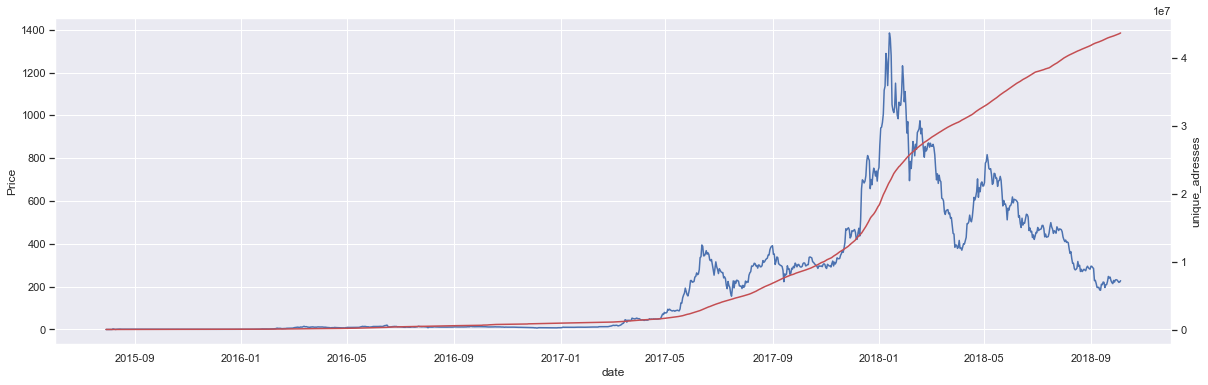

In [12]:
f, ax = plt.subplots(figsize=(20, 6))
ax = sns.lineplot(x="date", y="Price", data=df)
#ax.set(yscale="log")
ax2 = ax.twinx()
ax2 = sns.lineplot(x="date", y="unique_adresses", data=df, color='r')
ax2.grid(b=False)
plt.show()

## Transactions and price

(Logarithmic Scale)

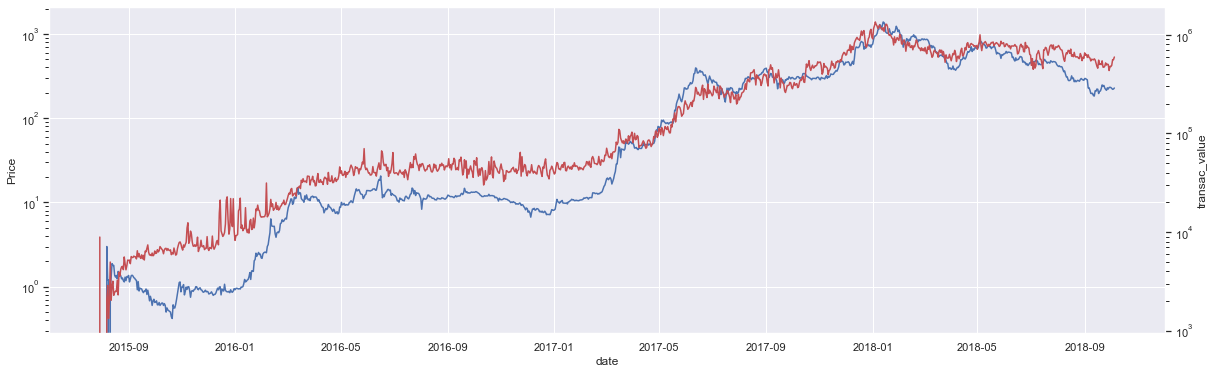

In [13]:
f, ax = plt.subplots(figsize=(20, 6))
ax = sns.lineplot(x="date", y="Price", data=df)
ax.set(yscale="log")
ax2 = ax.twinx()
ax2 = sns.lineplot(x="date", y="transac_value", data=df, color='r')
ax2.set(yscale="log")
ax2.grid(b=False)
plt.show()

## Correlation between inputs

In [14]:
#finding correlation between variables
corr_inputs= df.loc[:, df.columns != 'Price']
corr = corr_inputs.corr()

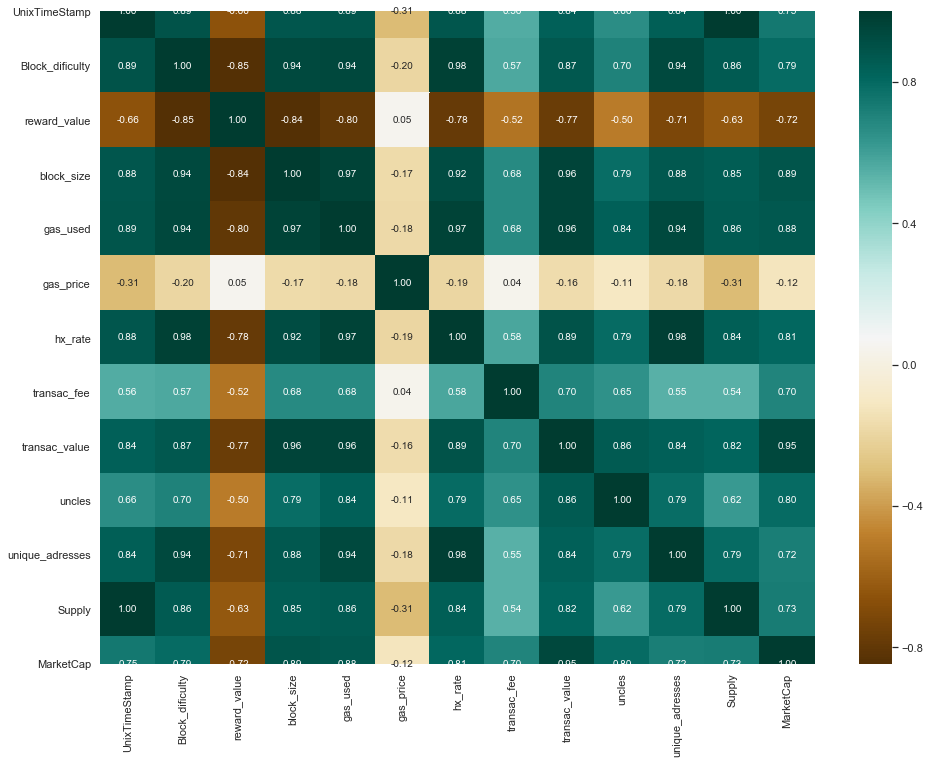

In [27]:
plt.figure(figsize=(16,12))
sns.heatmap(corr, annot =  True, cmap="BrBG", fmt=".2f")


# Regression

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
df.columns

Index(['UnixTimeStamp', 'Block_dificulty', 'reward_value', 'block_size',
       'gas_used', 'gas_price', 'hx_rate', 'transac_fee', 'transac_value',
       'uncles', 'unique_adresses', 'Supply', 'MarketCap', 'Price', 'date'],
      dtype='object')

In [18]:
inputs = df[['UnixTimeStamp','hx_rate','transac_value','unique_adresses']]
target= df['Price']

In [19]:
reg = LinearRegression()
reg.fit(inputs, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### R-Square

In [20]:
reg.score(inputs,target)

0.9250190433431014

### Adjusted R-square

In [21]:
def adj_r2(x,y):
    r2 = reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [22]:
adj_r2(inputs,target)

0.9247602652355711

In [23]:
from sklearn.feature_selection import f_regression

In [24]:
f_regression(inputs,target)

(array([1416.0861347 , 2007.49424734, 9377.44436065, 1188.13236851]),
 array([2.63026403e-203, 1.89576615e-255, 0.00000000e+000, 6.26777316e-180]))

In [25]:
p_values = f_regression(inputs,target)[1]
p_values.round(3)

array([0., 0., 0., 0.])

### Summary Table

In [26]:
reg_summary = pd.DataFrame(data = inputs.columns.values, columns=['Features'])
reg_summary ['Coefficients'] = reg.coef_
reg_summary ['p-values'] = p_values
reg_summary

,Features,Coefficients,p-values
0,UnixTimeStamp,-0.000001,2.630264e-203
1,hx_rate,0.002417,1.895766e-255
2,transac_value,0.000890,0.000000e+00
3,unique_adresses,-0.000018,6.267773e-180
